In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import linear_model
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/physics-vs-chemistry-vs-biology/dataset/train.csv
/kaggle/input/physics-vs-chemistry-vs-biology/dataset/test.csv
/kaggle/input/glass/glass.csv


In [2]:
grass_base=pd.read_csv('../input/glass/glass.csv')
#grass_base=grass_base.dropna()
grass_base.info() #feature output

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


<AxesSubplot:>

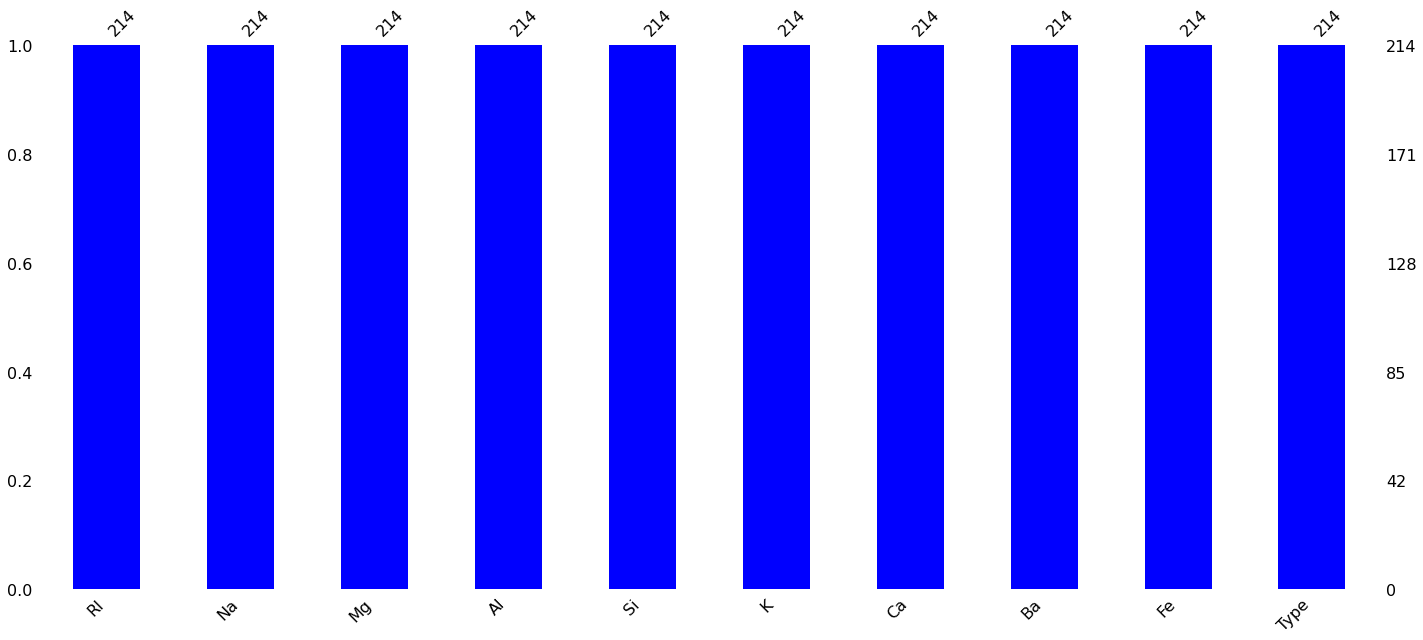

In [3]:
#Missing data visualization
msno.bar(grass_base, color = 'b', labels = True)

In [4]:
grass_base.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
grass_base.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
# направления PCA очень чувствительны к шкале данных => выполняем их стандартизацию (мат.ож.=0 :) => cov считать легче)
from sklearn.preprocessing import StandardScaler
X=grass_base.drop('Type',axis = 1)
Y=grass_base['Type']
# fit_transform для вычисления эмп-го среднего (мат.ож.) a и стандартного отклонения std, а также последующей стандартизации по ним
X=pd.DataFrame(StandardScaler().fit_transform(X))
X.columns = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]

In [7]:
grass_base_standard = pd.concat([X, Y], axis=1)
grass_base_standard.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1


# *1. Зниження розмірності і візуалізація даних*

Застосуйте методи зниження розмірності **sklearn.decomposition.PCA** і
**sklearn.manifold.TSNE** для візуалізації даних, з якими ви працювали в лабораторній № 2
(**знижуючи розмірність до двох**). Візуалізуйте результат.

In [8]:
from sklearn.decomposition import PCA # линейный метод (А НЕ ЛЮБОЙ ДАТАСЕТ линейный)
# другими распространенными сферами использования PCA есть: 
# методы разверточного анализа данных (максимальное «проникновение» в данные,выявление основных структур,
# выбор наиболее важных переменных,обнаружение отклонений и аномалий,проверка основных гипотез,разработка начальных моделей) 
# и шумоподавления сигналов в биржевой торговле и анализе геномных данных, уровней экспрессии генов в биоинформатике

# стремится находить направления с МАКСИМАЛЬНОЙ ДИСПЕРСИЕЙ в высокоразмерных данных
# И проецирует их на НОВОЕ ПР-ВО с равным или меньшим числом размерностей, чем исходное

# КАК ИМЕННО?

# x -> Wx, где х размерности k на 1, проекционная матрица W - d на k 
# (k<<d, k-кол-во собств.векторов, которые соот-ют k самым большим собств.знач-ям ков.матрицы)
# Новые оси (РС1, РС2) ортогональны друг другу, а самая большая дисперсия у ПЕРВОЙ компоненты, т.е. больше всего информации у ПЕРВОЙ компоненты
X_PCA=PCA(n_components=2).fit_transform(X)
grass_base_standard_PCA=pd.DataFrame(data=X_PCA,columns=['PC1','PC2'])
grass_base_standard_PCA['Type']=grass_base_standard['Type']
grass_base_standard_PCA.head()

,PC1,PC2,Type
0,1.151140,-0.529488,1
1,-0.574137,-0.759788,1
2,-0.940160,-0.929836,1
3,-0.142083,-0.961677,1
4,-0.351092,-1.091249,1


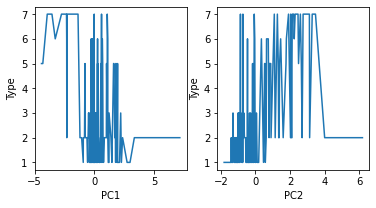

In [9]:
fig = plt.figure(figsize = (6, 3))
ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)
sns.lineplot(data=grass_base_standard_PCA,x='PC1',y='Type',ax=ax_1)
sns.lineplot(data=grass_base_standard_PCA,x='PC2',y='Type',ax=ax_2)
plt.show()

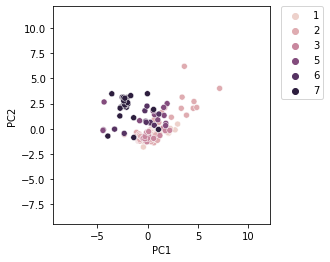

In [10]:
# Диаграмма рассеяния
fig, ax = plt.subplots(1)
sns.scatterplot(x='PC1', y='PC2', hue='Type', data=grass_base_standard_PCA)
lim = (X_PCA.min()-5, X_PCA.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [11]:
pca = PCA().fit(X) # А вот тут интересно! С fit_transform данный метод ругается, нужен fit, а все потому что 
# я уже стандартизировала X ранее (см. выше)
explained_variance_pca = pca.explained_variance_ratio_ # объясненная дисперсия = лямбда_j/sum(лямбда_j)
cum_sum_eigenvalues = np.cumsum(explained_variance_pca) # кумулятивная дисперсия = sum of лямбда_j/sum(лямбда_j)

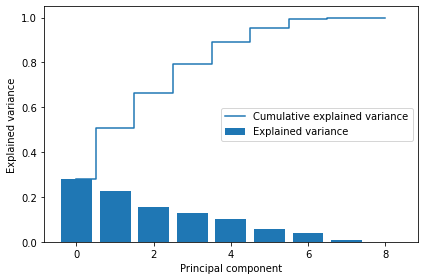

In [12]:
# Из рисунка видно, что снижать размерность до 2D совсем плохо, потому что кумулятивная дисперсия меньше 60%
# Из рисунка видно, что для точности 0.95 нужно где-то 5 главных компонент
plt.bar(range(0,len(explained_variance_pca)), explained_variance_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [13]:
# Узнаем сколько же нужно сохранить главных компонент, чтобы точность была 0.95 (ПОЛУЧИЛИ 5)
X_pca_95_perc = PCA(n_components=0.95).fit_transform(X)
grass_base_standard_PCA_95_perc=pd.DataFrame(data=X_pca_95_perc)
grass_base_standard_PCA_95_perc['Type']=grass_base_standard['Type']
grass_base_standard_PCA_95_perc.head()

,0,1,2,3,4,5,Type
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,1
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,1
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,1
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,1
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,1


In [14]:
#t-SNE НЕ для ПОДАЧИ в алгоритмы
from sklearn.manifold import TSNE # нелинейный метод (ЛУЧШИЙ для ВИЗУАЛИЗАЦИИ,для понимания количества кластеров)
X_TSNE= TSNE(n_components=2).fit_transform(X) # С fit_transform данный метод ругается, нужен fit, а все потому что 
# я уже стандартизировала X ранее (см. выше)
grass_base_standard_TSNE=pd.DataFrame(data=X_TSNE,columns=['TSNE_1','TSNE_2'])
grass_base_standard_TSNE['Type']=grass_base_standard['Type']
grass_base_standard_TSNE.head()

,TSNE_1,TSNE_2,Type
0,3.002252,6.270448,1
1,-1.479895,-2.411427,1
2,-2.678951,-6.669407,1
3,1.506758,-2.012903,1
4,1.272413,-3.931333,1


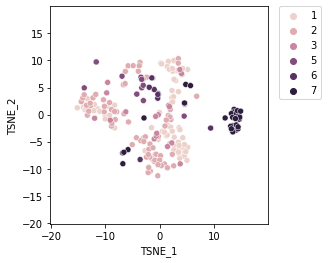

In [15]:
# Диаграмма рассеяния
fig, ax = plt.subplots(1)
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='Type', data=grass_base_standard_TSNE)
lim = (X_TSNE.min()-5, X_TSNE.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# *2. Кластерний аналіз*
*1) За допомогою алгоритму **k-means зробіть квантування зображення** (видалення візуально надлишкової інформації) **з глибиною 64, 32, 16 та 8 рівнів** для будь-якого обраного самостійно зображення.*
Приклад: https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html

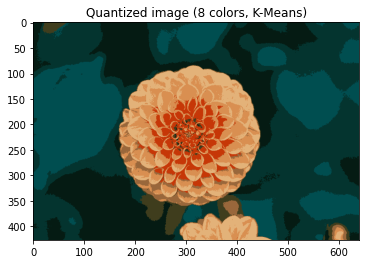

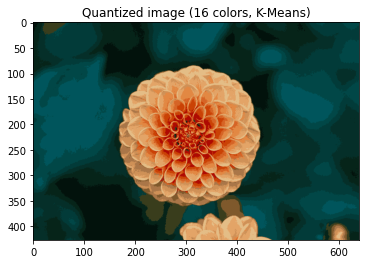

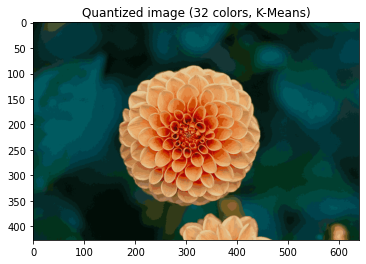

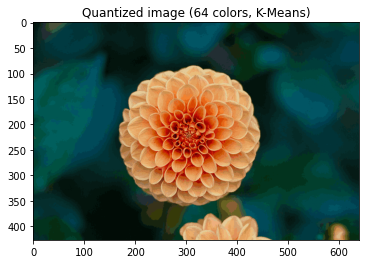

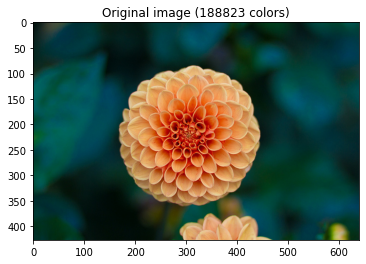

In [16]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image # for flower
from sklearn.utils import shuffle

# Load flower image
flower = load_sample_image("flower.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
flower = np.array(flower, dtype=np.float64) / 255
# How I count all the unique colors of the picture
unique_colors_of_pic  = np.unique(flower.reshape(-1, flower.shape[2]), axis=0)

# Load Image and transform to a 2D numpy array.
w, h, am_of_colors = tuple(flower.shape)
assert am_of_colors == 3 
image_array = np.reshape(flower, (w * h, am_of_colors))

# Fitting model on a small sub-sample of the data
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

fig = plt.figure()
for amount_of_clusters in [8, 16, 32, 64]:
    kmeans = KMeans(n_clusters=amount_of_clusters, random_state=0).fit(image_array_sample)
    labels = kmeans.predict(image_array) # Get labels for all points
    plt.title(f"Quantized image ({amount_of_clusters} colors, K-Means)") # Display result
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    plt.show()
    
plt.title(f"Original image ({unique_colors_of_pic.size} colors)") # Display result
plt.imshow(flower)
plt.show()

2) **Згенеруйте набір синтетичних даних у вигляді суміші двох гаусіан** за допомогою функції:
https://docs.scipy.org/doc/numpy1.13.0/reference/generated/numpy.random.multivariate_normal.html 
(застосуйте її **двічі з різними mean і cov, результат об’єднайте**)


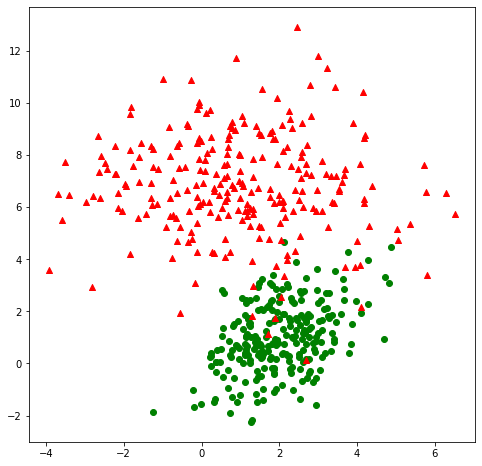

In [17]:
# Setting the expected value and variance of random variables
E_1, var_1 = [2,1], [[1,0.66],[0.66,2]]
num_points = 250
psi_1 = np.random.multivariate_normal(E_1, var_1, num_points)
E_2, var_2 = [1,7], [[4,0],[0,4]]
psi_2 = np.random.multivariate_normal(E_2, var_2, num_points)

psi = np.concatenate([psi_1, psi_2])
labels = np.array([0] * 250 + [1] *  250)

fig = plt.figure(figsize=(8,8))
plt.scatter(psi_1[:,0], psi_1[:,1], c = "green", label=0)
plt.scatter(psi_2[:,0], psi_2[:,1], marker="^", c = "red", label=1)
plt.show()

In [18]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
for i in range(2, 5):
    gmm = GaussianMixture(n_components=i, covariance_type='full')
    gmm_labels = gmm.fit_predict(psi)
    silhouette_avg = silhouette_score(psi, gmm_labels)
    print("For n_clusters =", i, " silhouette average:", silhouette_avg)

For n_clusters = 2  silhouette average: 0.571585468137616
For n_clusters = 3  silhouette average: 0.4883962909918911
For n_clusters = 4  silhouette average: 0.32963999123777227


**Розділіть суміш за допомогою EM алгоритму** (sklearn.mixture.GaussianMixture), зверніть
увагу на параметр **covariance_type**. За допомогою атрибутів **weights_ і covariances_
відновіть їхні значення**, порівняйте з оригінальними. Візуалізуйте результат. 

In [19]:
GMM = GaussianMixture(n_components=2, covariance_type='full')
GMM.fit(psi)
print('means:')
print(GMM.means_)
print('covariances:')
print(GMM.covariances_)

means:
[[2.00233354 1.02857976]
 [0.92824763 6.97530712]]
covariances:
[[[ 1.03606758  0.56094875]
  [ 0.56094875  1.79332819]]

 [[ 4.09837033 -0.01288228]
  [-0.01288228  3.29678617]]]


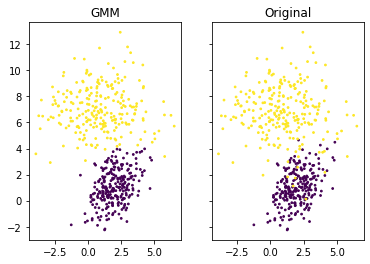

In [20]:
labels_pred = GMM.predict(psi)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(psi[:,0], psi[:,1], c=labels_pred, s=3)
ax2.set_title("Original")
ax2.scatter(psi[:,0], psi[:,1], c=labels, s=3)

means:
[[2.09935743 1.3121607 ]
 [0.69240663 7.23268778]]
covariances:
[[2.32148697 0.73894919]
 [0.73894919 2.72187958]]


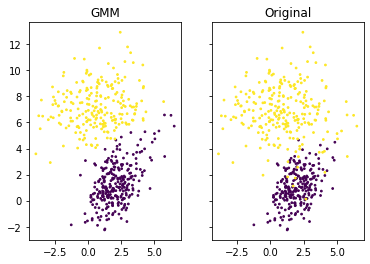

In [21]:
GMM = GaussianMixture(n_components=2, covariance_type='tied')
GMM.fit(psi)

labels_pred = GMM.predict(psi)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(psi[:,0], psi[:,1], c=labels_pred, s=3)
ax2.set_title("Original")
ax2.scatter(psi[:,0], psi[:,1], c=labels, s=3)

print('means:')
print(GMM.means_)
print('covariances:')
print(GMM.covariances_)

# *3. Обробка текстових даних*
Завантажте набір текстових даних (з мітками класів). **Проведіть передобробку даних**
(видаліть стоп-слова, пунктуацію), **за допомогою wordcloud зробіть** *візуалізацію найбільш*
*поширених слів або n-gram у кожному класі*.

In [22]:
test = pd.read_csv('../input/physics-vs-chemistry-vs-biology/dataset/test.csv',encoding = 'latin1')
train = pd.read_csv('../input/physics-vs-chemistry-vs-biology/dataset/train.csv',encoding = 'latin1')

P_vs_C_vs_B_base = train.append(test, ignore_index = True)
P_vs_C_vs_B_base = P_vs_C_vs_B_base.drop("Id", axis = 1)
P_vs_C_vs_B_base.head()

,Comment,Topic
0,A few things. You might have negative- frequen...,Biology
1,Is it so hard to believe that there exist part...,Physics
2,There are bees,Biology
3,I'm a medication technician. And that's alot o...,Biology
4,Cesium is such a pretty metal.,Chemistry


In [23]:
import re
import string
from nltk.corpus import stopwords
stop_words_english = stopwords.words("english")
stop_words_spanish = stopwords.words("spanish")
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
def clean_text(text):
    text = text.lower()
    text = re.sub("https*\S+", " ", text) #remove_url
    text = re.sub("@\S+", " ", text) #remove_mentions
    text = re.sub("#\S+", " ", text) #remove_hashtags
    text = re.sub("\d", " ", text) #remove_numbers
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) #remove_punctuations
    text = re.sub(r'[^a-zA-Z]',' ',text) #remove ^a-zA-Z
    text = re.sub('(?u)\b\w\w+\b',' ',text) #remove singular
    text = emoji_pattern.sub(r'', text) #remove emoji
    text = re.sub(r'\b\w{1,3}\b', ' ', text)
    text = re.sub('think',' ', text)
    text = re.sub('thing',' ', text)
    text = re.sub('people',' ', text)
    text = re.sub('first',' ', text)
    text = re.sub('really',' ', text)
    text = re.sub('better',' ', text)
    text = re.sub('thank',' ', text)
    text = re.sub('probably',' ', text)
    text = re.sub('still',' ', text)
    text = re.sub('yet',' ', text)
    text = re.sub('believe',' ', text)
    text = re.sub('found',' ', text)
    text = re.sub('removed',' ', text)
    text = re.sub('good',' ', text)
    text = re.sub('make',' ', text)
    text = re.sub('look',' ', text)
    text = re.sub('please',' ', text)
    text = re.sub('one',' ', text)
    text = re.sub('know',' ', text)
    text = re.sub('see',' ', text)
    text = re.sub('even',' ', text)
    text = re.sub('lot',' ', text)
    text = re.sub('much',' ', text)
    text = re.sub('say',' ', text)
    text = re.sub('deleted',' ', text)
    text = re.sub('bot',' ', text)
    text = re.sub('info',' ', text)
    text = re.sub('way',' ', text)
    text = re.sub('work',' ', text)
    text = re.sub('need',' ', text)
    text = re.sub('use',' ', text)
    text = re.sub('ing',' ', text)
    text = re.sub('beca',' ', text)
    text = re.sub('job',' ', text)
    text = re.sub('time',' ', text)
    text = re.sub('yes',' ', text)
    text = re.sub('well',' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words_english])
    text = ' '.join([word for word in text.split(' ') if word not in stop_words_spanish])
    text = re.sub('\s{2,}',' ', text) #remove_extra_spaces
    return text

P_vs_C_vs_B_base2 = P_vs_C_vs_B_base

P_vs_C_vs_B_base['Comment'] = P_vs_C_vs_B_base['Comment'].apply(lambda text : clean_text(text))
P_vs_C_vs_B_base.head()

,Comment,Topic
0,might negative frequency dependent selection ...,Biology
1,hard exist particulars detect invented mean l...,Physics
2,bees,Biology
3,medication technician drugs liver immediately...,Biology
4,cesium pretty metal,Chemistry


In [24]:
# Let us lemmatize the comments
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    words = word_tokenize(text)
    return [lemmatizer.lemmatize(t) for t in words]
P_vs_C_vs_B_base["Comment_lemmatized"] = P_vs_C_vs_B_base["Comment"].apply(lambda text: lemmatize_words(text))
P_vs_C_vs_B_base.head()

,Comment,Topic,Comment_lemmatized
0,might negative frequency dependent selection ...,Biology,"[might, negative, frequency, dependent, select..."
1,hard exist particulars detect invented mean l...,Physics,"[hard, exist, particular, detect, invented, me..."
2,bees,Biology,[bee]
3,medication technician drugs liver immediately...,Biology,"[medication, technician, drug, liver, immediat..."
4,cesium pretty metal,Chemistry,"[cesium, pretty, metal]"


In [25]:
def topic_encode(topic):
    if topic == 'Biology':
        return 3
    elif topic == 'Physics':
        return 2
    elif topic == 'Chemistry':
        return 1
    else:
        return 0
    
P_vs_C_vs_B_base['Topic'] = P_vs_C_vs_B_base['Topic'].apply(lambda x : topic_encode(x))
P_vs_C_vs_B_base.head()

,Comment,Topic,Comment_lemmatized
0,might negative frequency dependent selection ...,3,"[might, negative, frequency, dependent, select..."
1,hard exist particulars detect invented mean l...,2,"[hard, exist, particular, detect, invented, me..."
2,bees,3,[bee]
3,medication technician drugs liver immediately...,3,"[medication, technician, drug, liver, immediat..."
4,cesium pretty metal,1,"[cesium, pretty, metal]"


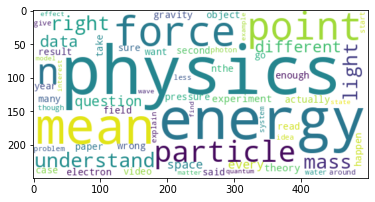

In [26]:
from wordcloud import WordCloud

Biology = P_vs_C_vs_B_base[P_vs_C_vs_B_base['Topic'] == 3].Comment
Physics  = P_vs_C_vs_B_base[P_vs_C_vs_B_base['Topic'] == 2].Comment
Chemistry = P_vs_C_vs_B_base[P_vs_C_vs_B_base['Topic'] == 1].Comment
Other = P_vs_C_vs_B_base[P_vs_C_vs_B_base['Topic'] == 0].Comment

wordcould = WordCloud(min_font_size = 10, max_words = 200, width = 500, height = 250, background_color="white").generate(" ".join(Physics))
plt.imshow(wordcould, interpolation = 'bilinear')
plt.show()

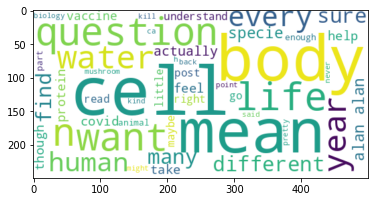

In [27]:
wordcould = WordCloud(min_font_size = 10, max_words = 200, width = 500, height = 250, background_color="white").generate(" ".join(Biology))
plt.imshow(wordcould, interpolation = 'bilinear')

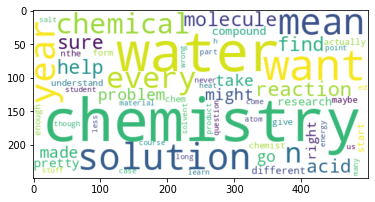

In [28]:
wordcould = WordCloud(min_font_size = 10, max_words = 200, width = 500, height = 250, background_color="white").generate(" ".join(Chemistry))
plt.imshow(wordcould, interpolation = 'bilinear')

Векторизуйте тексти (наприклад за допомогою **sklearn.feature_extraction.text.TfidfVectorizer**). **Проведіть класифікацію
текстових даних, зробіть оцінку якості.** Застосуйте алгоритм **LDA до кожного класу**, визначте декілька тематик **(sklearn.decomposition.LatentDirichletAllocation)**

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Для преобразованияя текста в векторы
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(P_vs_C_vs_B_base['Comment'], P_vs_C_vs_B_base['Topic'], test_size=0.20)

vectorizer = CountVectorizer(max_df=500, min_df=10)
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)
y_pred

array([1, 3, 3, ..., 1, 1, 3])

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.61      0.65       675
           2       0.72      0.59      0.65       523
           3       0.66      0.79      0.72       859

    accuracy                           0.68      2057
   macro avg       0.69      0.66      0.67      2057
weighted avg       0.69      0.68      0.68      2057



In [31]:
print(confusion_matrix(y_test, y_pred))

[[411  57 207]
 [ 67 308 148]
 [115  62 682]]


In [32]:
tfidf_vectorizer = TfidfVectorizer(max_df=500, min_df=10)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

clf = MultinomialNB(alpha=0.1)
clf.fit(tfidf_train, y_train)
y_pred = clf.predict(tfidf_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.61      0.66       675
           2       0.75      0.57      0.65       523
           3       0.66      0.83      0.73       859

    accuracy                           0.69      2057
   macro avg       0.71      0.67      0.68      2057
weighted avg       0.70      0.69      0.69      2057



In [33]:
print(confusion_matrix(y_test, y_pred))

[[412  49 214]
 [ 67 296 160]
 [ 98  48 713]]


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

clusterization_models=[MultinomialNB(), RandomForestClassifier(), SVC()]

Accuracy_test=[]
Accuracy_train=[]
for index,model in enumerate(clusterization_models):
    print(f'{index}. {model}')
    clust_model=model
    clust_model.fit(tfidf_train,y_train)
    clust_model.predict(tfidf_train)
    clust_model.predict(tfidf_test)
    Accuracy_train.append(clust_model.score(tfidf_train, y_train))
    Accuracy_test.append(clust_model.score(tfidf_test, y_test))

0. MultinomialNB()
1. RandomForestClassifier()
2. SVC()


In [35]:
models_and_their_accuracy=pd.DataFrame(data={'Model':clusterization_models,'Accuracy_train':Accuracy_train,'Accuracy_test':Accuracy_test})
models_and_their_accuracy

,Model,Accuracy_train,Accuracy_test
0,MultinomialNB(),0.748541,0.692270
1,"(DecisionTreeClassifier(max_features='auto', r...",0.910141,0.647545
2,SVC(),0.881931,0.670880


In [36]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=3, random_state=0)

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

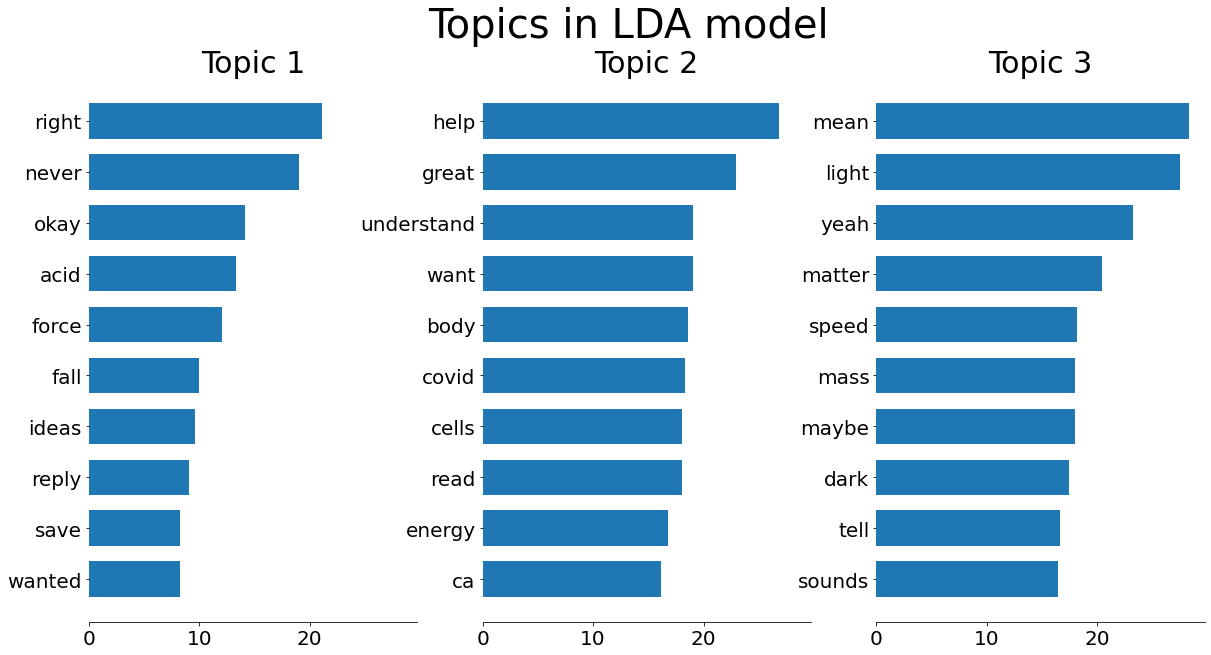

In [37]:
LDA = LatentDirichletAllocation(n_components=10, random_state=0)
LDA.fit(tfidf_train)
feature_names = vectorizer.get_feature_names()
plot_top_words(LDA, feature_names, 10, 'Topics in LDA model')

In [ ]:
feature_names

In [ ]:
LDA = LatentDirichletAllocation(n_components=10, random_state=0)
LDA.fit(X_train_transformed)
feature_names = vectorizer.get_feature_names()
plot_top_words(LDA, feature_names, 10, 'Topics in LDA model')

Хотела сделать как лучше, а тут вместо физики коронавирус :(

Попробую ничего особо не удалять и сохранить результат как есть

In [ ]:
def clean_text2(text):
    text = text.lower()
    text = re.sub("https*\S+", " ", text) #remove_url
    text = re.sub("@\S+", " ", text) #remove_mentions
    text = re.sub("#\S+", " ", text) #remove_hashtags
    text = re.sub("\d", " ", text) #remove_numbers
    text = re.sub(r'\b\w{1,3}\b', ' ', text)
    # можно без удаления пунктуации, ибо знаем, что в TfidfVectorizer она и так происходит
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) #remove_punctuations 
    text = re.sub(r'[^a-zA-Z]',' ',text) #remove ^a-zA-Z
    text = re.sub('(?u)\b\w\w+\b',' ',text) #remove singular
    text = emoji_pattern.sub(r'', text) #remove emoji
    text = ' '.join([word for word in text.split(' ') if word not in stop_words_english])
    text = ' '.join([word for word in text.split(' ') if word not in stop_words_spanish])
    text = re.sub('\s{2,}',' ', text) #remove_extra_spaces
    return text

In [ ]:
P_vs_C_vs_B_base2['Comment'] = P_vs_C_vs_B_base2['Comment'].apply(lambda text : clean_text2(text))
P_vs_C_vs_B_base2.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(P_vs_C_vs_B_base2['Comment'], P_vs_C_vs_B_base2['Topic'], test_size=0.20)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=500, min_df=10, ngram_range=(1, 3))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
clf = MultinomialNB(alpha=0.1)
clf.fit(tfidf_train, y_train)
y_pred = clf.predict(tfidf_test)

print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
LDA = LatentDirichletAllocation(n_components=10, random_state=0)
LDA.fit(X_train_transformed)
feature_names = vectorizer.get_feature_names()
plot_top_words(LDA, feature_names, 10, 'Topics in LDA model')